<a href="https://colab.research.google.com/github/knagabharathi/Python/blob/main/Netflix_case_studies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [119]:
df = pd.read_csv('netflix_titles.csv')

#ANALYSING THE BASIC MATRICS

data set consist of following columns

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [121]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


#DATA PREPROCESSING

#Unnesting columns

Un-nest the columns those have cells with multiple comma separated values by
creating multiple rows

list of columns having multiple comma seperated values

1.director
2.cast
3.country
4.listed_in



# process -> Split by commas and explode

In [122]:
dfc = df.copy()

In [103]:
dfc.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [13]:
# converting the columns to str
#df = df.astype(str)
#dfc = dfc.astype(str)

In [123]:
df_columns = dfc.columns[[3,4,5,10]]
df_columns

Index(['director', 'cast', 'country', 'listed_in'], dtype='object')

In [124]:
#exploding the columns
for i in df_columns:
  if df[i].str.contains(',').any():
    dfc[i] = df[i].str.split(',')
    dfc = dfc.explode(i)

dfc = dfc.reset_index(drop=True)

In [37]:
#dfc.drop('index',axis=1, inplace=True)

# Verify 4 columns exploded or Not

In [125]:
#return No couput
for i in df_columns:
  if dfc[i].str.contains(',').any():
    print(i)

# return No result - Success

#2.Identifying the missing values

In [126]:
dfc

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
202060,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...
202061,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...
202062,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...
202063,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...


In [127]:
dfc.isnull().sum()

show_id             0
type                0
title               0
director        50643
cast             2149
country         11897
date_added        158
release_year        0
rating             67
duration            3
listed_in           0
description         0
dtype: int64

Only director , cast, country, date_added, rating , duration had missing values

In [69]:
# replace cast with Unknown in categorical columns - cast ,director, country
column_unknown = ['cast' ,'director', 'country']
df[column_unknown] = df[column_unknown].fillna('Unknown', inplace=True)

# replace null with 0 in continous variable colum - Rating , duration
column_0 = ['rating','duration']
dfc[column_0] = dfc[column_0].fillna(0, inplace=True)

<ipython-input-69-c05c72a7d12c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_unknown] = df[column_unknown].fillna('Unknown', inplace=True)
<ipython-input-69-c05c72a7d12c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc[column_0] = dfc[column_0].fillna(0, inplace=True)


In [132]:
dfc['director'].fillna('Unknown',inplace=True)
dfc['cast'].fillna('Unknown',inplace=True)
dfc['country'].fillna('Unknown',inplace=True)
dfc['rating'].fillna(0,inplace=True)
dfc['duration'].fillna(0,inplace=True)

x = dfc['date_added'].value_counts().idxmax()
dfc['date_added'].fillna(x, inplace=True)

In [88]:
# change the date type to column - date_added
#dfc['date_added'] = pd.to_datetime(dfc['date_added'])

In [133]:
#verified - returns 0 for all columns
dfc.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

#Splitted the table for movie and Tv show

In [164]:
#Splitted the movie and TV shows
dfc_movie = dfc [dfc['type'] == 'Movie'].copy()
dfc_tv = dfc[dfc ['type'] == 'TV Show'].copy()

In [162]:
dfc_tv.shape

(56148, 12)

In [145]:
dfc_movie.shape

(145917, 12)

In [146]:
dfc.shape

(202065, 12)

In [166]:
# Alter the Duration column
dfc_movie['duration'] = dfc_movie['duration'].str.split().str[0]
dfc_tv['duration'] = dfc_tv['duration'].str.split().str[0]

In [167]:
dfc_movie.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
159,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Vanessa Hudgens,Unknown,"September 24, 2021",2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
160,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Kimiko Glenn,Unknown,"September 24, 2021",2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
161,s7,Movie,My Little Pony: A New Generation,Robert Cullen,James Marsden,Unknown,"September 24, 2021",2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
162,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Sofia Carson,Unknown,"September 24, 2021",2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...


In [168]:
dfc_tv.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2,TV Dramas,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,Unknown,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t..."
5,s2,TV Show,Blood & Water,Unknown,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2,TV Dramas,"After crossing paths at a party, a Cape Town t..."


#diversity of datasets

In [187]:
print(dfc_movie['title'].nunique()) # 6137 unique movies are there
print(dfc_tv['title'].nunique()) # 2676 TV shows are there
print(dfc['director'].nunique()) # 5121 directors are there

print(dfc_movie['director'].nunique()) # 4887 director directed movies
print(dfc_tv['director'].nunique()) # 301 director directed TV shows

directed_both = set(dfc_movie['director']) & set(dfc_tv['director'])
len(directed_both)

# 67 directors make both movies and tv shows

6131
2676
5121
4887
301


67

Cast of TV shows

In [189]:
print(dfc_movie['cast'].nunique()) # 27880
print(dfc_tv['cast'].nunique()) # 15502
print(dfc['cast'].nunique()) # 39297

casted_both = set(dfc_movie['cast']) & set(dfc_tv['cast'])
len(casted_both) # 4085 casted in both TV shows and Movies

27880
15502
39297


4085

#Country wise TV and MOvies

In [194]:
print(dfc['country'].nunique()) # 198 total unique contries
print(dfc_movie['country'].nunique()) # 188
print(dfc_tv['country'].nunique()) # 103

combined_set  = set(dfc_movie['country']) & set(dfc_tv['country'])
len(combined_set)
 # 93 countries produced both movies and tV shows

198
188
103


93

#geners in movies

In [196]:
dfc_movie['listed_in'].value_counts()

 International Movies        27141
Dramas                       19657
Comedies                     13894
Action & Adventure           12216
 Dramas                      10149
 Independent Movies           9564
Children & Family Movies      9294
 Comedies                     6935
 Romantic Movies              6392
 Thrillers                    6283
 Sci-Fi & Fantasy             3875
Horror Movies                 3259
 Music & Musicals             3012
Documentaries                 2285
 Sports Movies                1528
 Horror Movies                1312
International Movies          1102
Classic Movies                 946
 Cult Movies                   908
 LGBTQ Movies                  833
Thrillers                      824
 Anime Features                765
 Faith & Spirituality          719
Stand-Up Comedy                516
 Classic Movies                497
 Children & Family Movies      477
Movies                         412
Anime Features                 280
Independent Movies  

#genres in TV shows

In [197]:
dfc_tv['listed_in'].value_counts()

 TV Dramas                       7956
International TV Shows           7065
 International TV Shows          5780
Crime TV Shows                   4020
Kids' TV                         3809
 TV Comedies                     3768
 Romantic TV Shows               2729
Anime Series                     2313
 Spanish-Language TV Shows       2088
British TV Shows                 1808
 TV Action & Adventure           1724
 TV Mysteries                    1281
TV Comedies                      1195
 Korean TV Shows                 1122
 TV Sci-Fi & Fantasy             1038
TV Dramas                         986
 TV Thrillers                     768
 Kids' TV                         759
 TV Horror                        750
 Teen TV Shows                    742
 Crime TV Shows                   713
TV Action & Adventure             564
Docuseries                        546
Reality TV                        413
TV Shows                          337
 Reality TV                       322
Romantic TV 

# continous variable exploration

count of movies in each genre

In [239]:
gen_count = dfc_movie['listed_in'].value_counts()[:20]
x = gen_count.index
y = gen_count.values

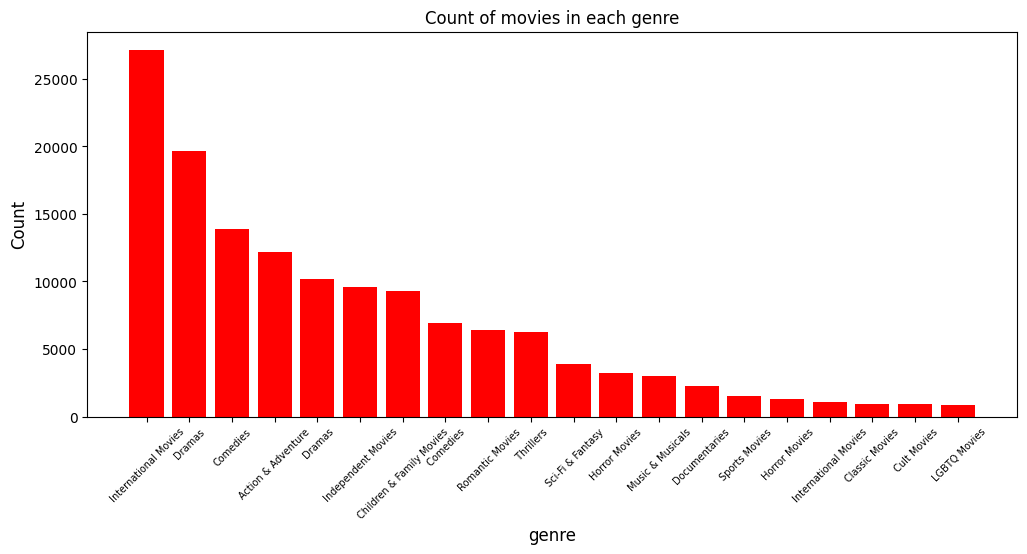

In [240]:
plt.figure(figsize=(12,5))
plt.bar(x,y,color='red')
plt.title('Count of movies in each genre')
plt.xlabel('genre',fontsize = 12)
plt.ylabel('Count',fontsize = 12)

plt.xticks(fontsize = 7,rotation = 45)
plt.show()

#International movies, Dramas , comedy's are the Top 3 genres of Movies in Netflix

count TV shows in each genre

In [241]:
tv_gen = dfc_tv['listed_in'].value_counts()[:20]
x = tv_gen.index
y = tv_gen.values

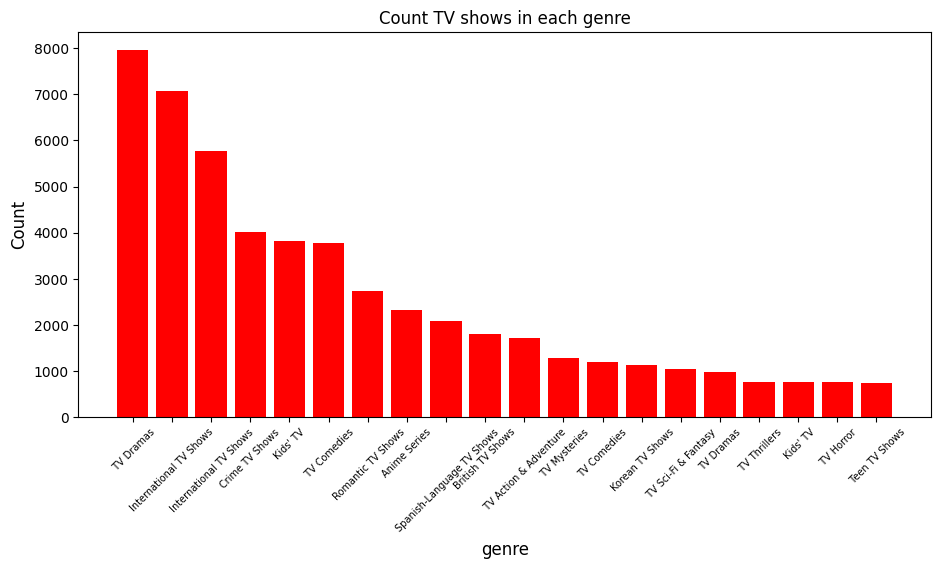

In [242]:
plt.figure(figsize = (11,5))
plt.bar(x,y,color='red')
plt.title('Count TV shows in each genre')
plt.xlabel('genre',fontsize = 12)
plt.ylabel('Count',fontsize = 12)

plt.xticks(rotation = 45,fontsize= 7)
plt.show()

#Tv Dramas , International TV shows, crime TV shows are the Top 3 genres of Tv shows in netflix

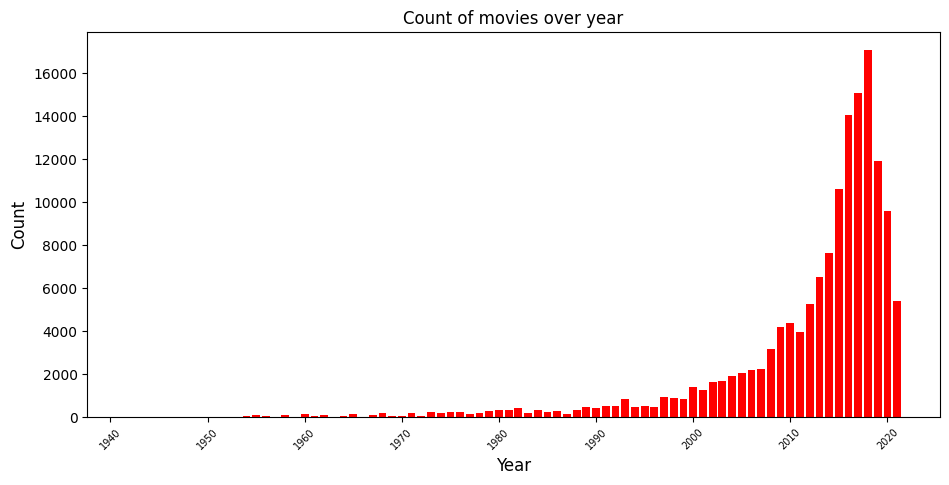

In [243]:
release_cnt = dfc_movie['release_year'].value_counts()
x = release_cnt.index
y = release_cnt.values


plt.figure(figsize = (11,5))
plt.bar(x,y,color='red')
plt.title('Count of movies over year')
plt.xlabel('Year',fontsize = 12)
plt.ylabel('Count',fontsize = 12)

plt.xticks(rotation = 45,fontsize= 7)
plt.show()

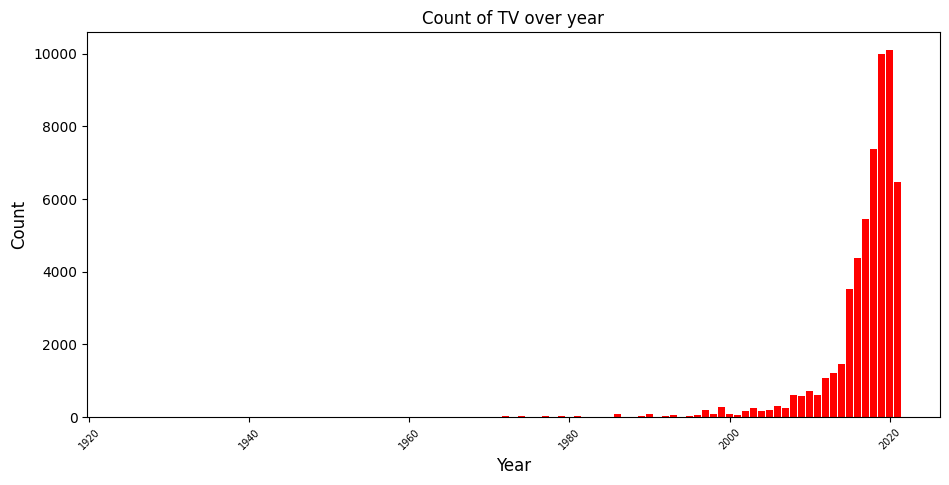

In [244]:
release_cnt = dfc_tv['release_year'].value_counts()
x = release_cnt.index
y = release_cnt.values


plt.figure(figsize = (11,5))
plt.bar(x,y,color='red')
plt.title('Count of TV over year')
plt.xlabel('Year',fontsize = 12)
plt.ylabel('Count',fontsize = 12)

plt.xticks(rotation = 45,fontsize= 7)
plt.show()

# last 7 years , TV shows become so popular

#Distribution

In [293]:
dfc_movie['duration']

0          90
159        91
160        91
161        91
162        91
         ... 
202060    111
202061    111
202062    111
202063    111
202064    111
Name: duration, Length: 145917, dtype: object

In [301]:
#change the data type to int - > to plot Histogram

#dfc_movie['duration'].isnull().sum()
dfc_movie['duration'].fillna(0,inplace=True)
dfc_movie['duration'] = dfc_movie['duration'].astype(int)

<Axes: xlabel='duration', ylabel='Count'>

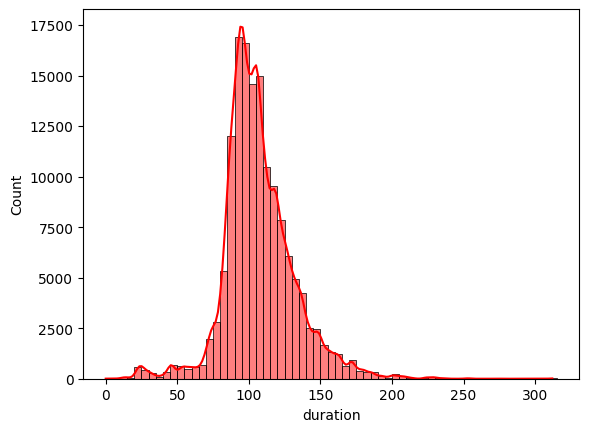

In [317]:
sns.histplot(dfc_movie['duration'],binwidth= 5, kde= True, color ='red')

#Most of movies falls between 80 to 140 minuets

distribution of TV shows

<Axes: xlabel='duration', ylabel='Count'>

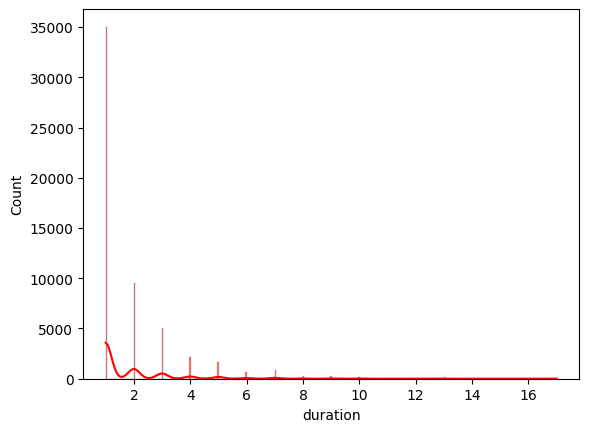

In [319]:
dfc_tv['duration'].fillna(0,inplace=True)
dfc_tv['duration'] = dfc_tv['duration'].astype(int)
sns.histplot(dfc_tv['duration'],kde=True,color='red')

# Most of Tv shows only had 1 and 2 seasons

Number of movies produced in each country - Top 10

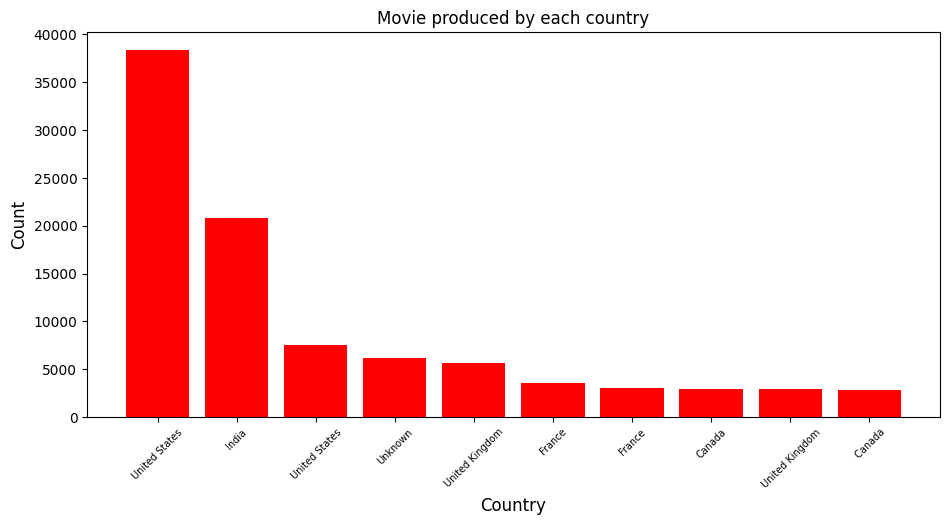

In [323]:
cun  = dfc_movie['country'].value_counts()[:10]
x = cun.index
y = cun.values

plt.figure(figsize = (11,5))
plt.bar(x,y,color='red')
plt.title('Movie produced by each country')
plt.xlabel('Country',fontsize = 12)
plt.ylabel('Count',fontsize = 12)

plt.xticks(rotation = 45,fontsize= 7)
plt.show()

#united states, India, France make more films

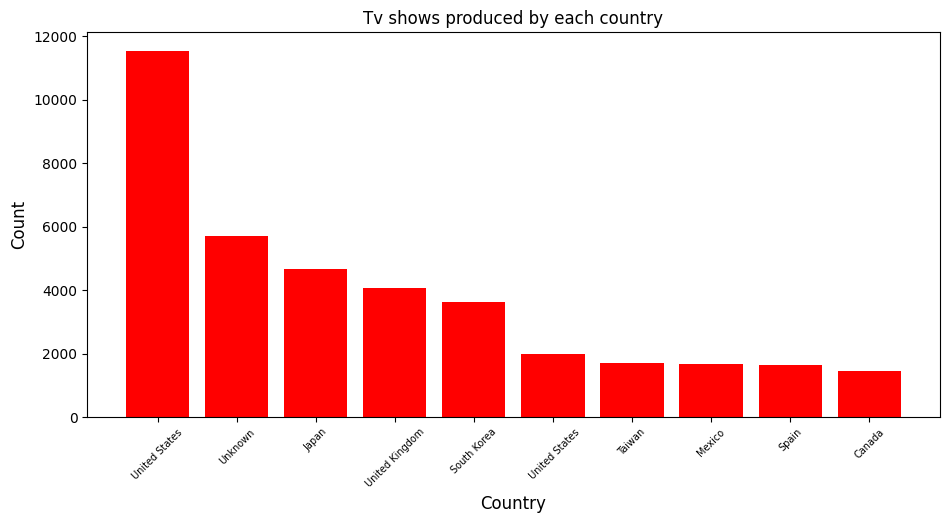

In [324]:
cun  = dfc_tv['country'].value_counts()[:10]
x = cun.index
y = cun.values

plt.figure(figsize = (11,5))
plt.bar(x,y,color='red')
plt.title('Tv shows produced by each country')
plt.xlabel('Country',fontsize = 12)
plt.ylabel('Count',fontsize = 12)

plt.xticks(rotation = 45,fontsize= 7)
plt.show()

#United states , Japan, UK , South korea makes more TV shows

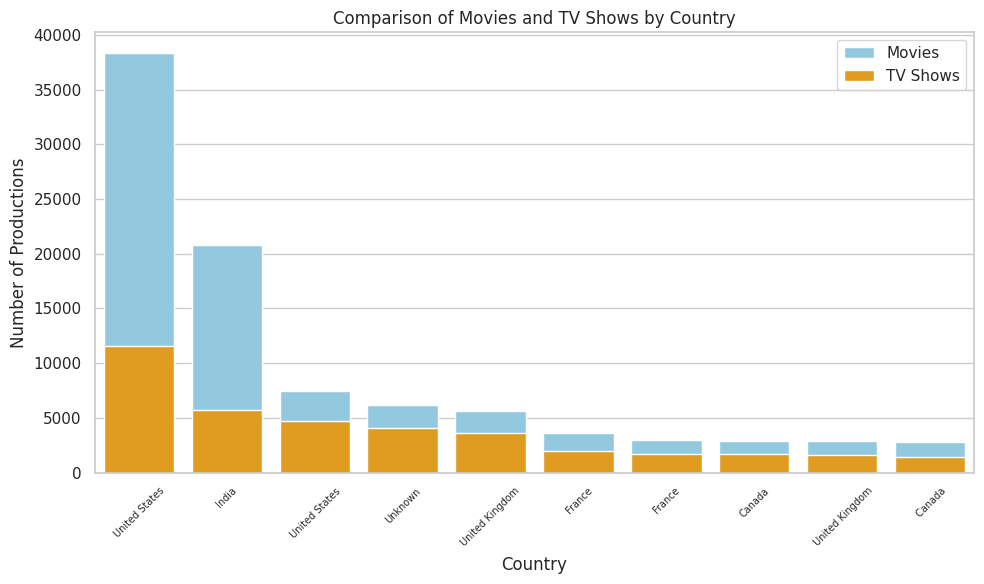

In [351]:
cun1  = dfc_movie['country'].value_counts()[:10]
#x1 = cun1.index
#y1 = cun1.values

cun2  = dfc_tv['country'].value_counts()[:10]
#x2 = cun2.index
#y2 = cun2.values'''

combined_df = pd.DataFrame({'Country': cun1.index,
                            'Movies': cun1.values,
                            'TV Shows': cun2.values})

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.barplot(data=combined_df, x='Country', y='Movies', color='skyblue', label='Movies')
sns.barplot(data=combined_df, x='Country', y='TV Shows', color='orange', label='TV Shows')
plt.xlabel('Country')
plt.ylabel('Number of Productions')
plt.title('Comparison of Movies and TV Shows by Country')
plt.xticks(rotation=45)
plt.legend()
plt.xticks(rotation = 45,fontsize= 7)
plt.tight_layout()
plt.show()


In [355]:
dfc_movie['date_added'] = pd.to_datetime(dfc_movie['date_added'])

In [359]:
dfc_movie['release_week'] = dfc_movie['date_added'].dt.week

<ipython-input-359-678fd30723fa>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  dfc_movie['release_week'] = dfc_movie['date_added'].dt.week


In [361]:
dfc_movie['release_week'].value_counts()

1     8456
44    5563
9     5094
35    5048
26    4931
40    4905
31    4388
27    3808
48    3737
18    3686
13    3503
39    3502
30    3262
22    3237
23    3164
5     3148
15    3083
28    2744
7     2636
17    2627
14    2609
36    2586
25    2568
37    2559
43    2521
10    2515
50    2463
33    2418
29    2361
34    2332
16    2323
51    2276
11    2243
49    2181
42    2105
38    2086
3     2031
24    1920
52    1840
20    1829
41    1807
47    1740
6     1649
19    1630
2     1618
21    1606
8     1538
46    1519
12    1431
53    1413
45    1398
32    1233
4     1047
Name: release_week, dtype: int64

In [362]:
dfc_movie['release_month'] = dfc_movie['date_added'].dt.month_name

In [364]:
dfc_movie['release_month'].value_counts()

<bound method PandasDelegate._add_delegate_accessors.<locals>._create_delegator_method.<locals>.f of <pandas.core.indexes.accessors.DatetimeProperties object at 0x783411d3ff70>>    145917
Name: release_month, dtype: int64